<h1>House Price Prediction</h1>

<h4><b>Step 1: Problem Definition</b></h4>
<p>We want to predict the price of the house based on the features like
<ul>Number of Rooms</ul>
<ul>Area in square feet</ul>
<ul>Location</ul>
<ul>Age of the house..etc</ul>
<b>Type:</b>Supervised Learning<br>
<b>Algorithm used:</b>Linear Regression(predicting a continous value)

<h4><b>Step 2: Import and Explore the Dataset(EDA)</b></h4>
<h5><b>2.1: Import Libraries</b></h5>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set styles for plots
sns.set(style='whitegrid')

<h5><b>2.2: Load the Dataset</b></h5>

In [2]:
# Loading the Dataset
df = pd.read_csv('AmesHousing.csv')

# Preview the data
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<h5><b>2.3: Basic EDA</b></h5>

In [4]:
# Shape of data
print("Dataset shape:", df.shape)

# Summary of columns
print(df.info())

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum().sort_values(ascending=False).head(20))


Dataset shape: (2930, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   o

<h5><b>2.4: Visualizing Target Variable</b></h5>

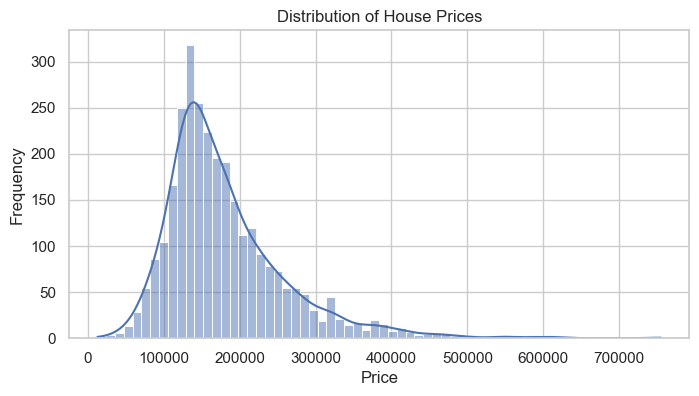

In [5]:
# Histogram of house prices
plt.figure(figsize=(8,4))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


<h4><b>Step 3: Data Preprocessing</b></h4>

<h5><b>3.1: Handling the Missing Values</b></h5>

In [7]:
#Drop columns with >80% Missing Data
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)
print("Shape after dropping columns",df.shape)

Shape after dropping columns (2930, 76)


In [8]:
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


<h5><b>3.2: Encode Categorical Variables</b></h5>
Use One-Hot Encoding:

In [9]:
df = pd.get_dummies(df, drop_first=True)
print("Shape after encoding:", df.shape)

Shape after encoding: (2930, 245)


<h5><b>3.3: Split Features and Target</b></h5>

In [12]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

<h5><b>3.4: Train/Test Split</b></h5>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


<h5><b>3.5: Feature Scaling(For Regression)</b></h5>

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2344, 244)
X_test shape: (586, 244)
y_train shape: (2344,)
y_test shape: (586,)


<h4><b>Step 4: Model Training</b></h4>
<h5>4.1: Linear Regression</h5>

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

<h5><b>4.2: Make Predictions</b></h5>

In [17]:
y_pred = model.predict(X_test)

<h5><b>4.3: Print Model Coefficients</b></h5>

In [18]:
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coeff_df.head(10)  # Top 10 influential features


,Feature,Coefficient
118,Roof Matl_Membran,667913.784635
123,Roof Matl_WdShngl,662815.336967
119,Roof Matl_Metal,658804.161685
121,Roof Matl_Tar&Grv,614661.782102
120,Roof Matl_Roll,614510.842767
122,Roof Matl_WdShake,606224.583225
117,Roof Matl_CompShg,599333.655680
68,Neighborhood_GrnHill,108286.629021
210,Functional_Sal,-84563.111544
222,Garage Qual_Po,-76282.428445


<h4><b>Step 5: Model Evaluation</b><h4>
<h5><b>5.1: Evaluation Metrics</b></h5>

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("(MAE) Mean Absolute Error", mae)
print("(MSE)Mean Squared Error", mse)
print("R2 Score (R2)", r2)

(MAE) Mean Absolute Error 16340.915236781913
(MSE)Mean Squared Error 850429157.9867502
R2 Score (R2) 0.8939290210279462


<h5><b>5.2: Visualize Predictions</b></h5>

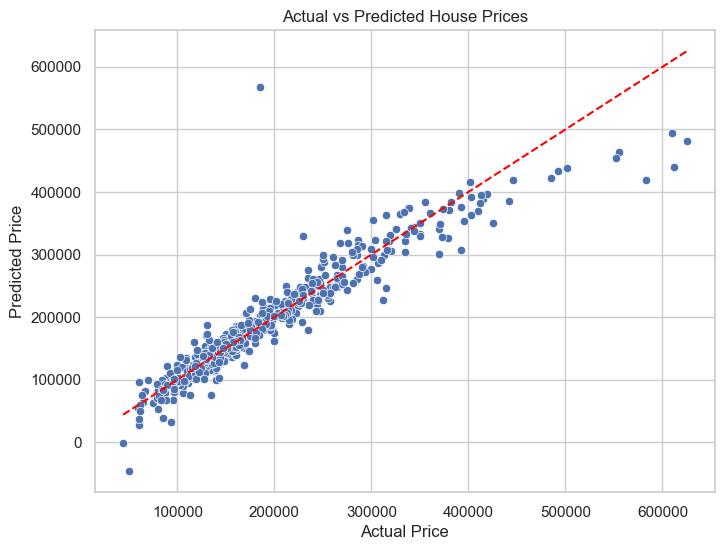

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()
